In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
df = pd.read_csv("all-signals.csv")

In [49]:
df.head()

,Index,rightLegAngleSignal,leftLegAngleSignal,yPositionOfNoseSignal,xPositionOfRHipSignal,yPositionOfRHipSignal,xPositionOfLHipSignal,yPositionOfLHipSignal
0,0,45.000000,NaN,NaN,172.0,84.0,188.0,164.0
1,1,NaN,NaN,NaN,172.0,84.0,NaN,NaN
2,2,90.000000,NaN,NaN,212.0,300.0,156.0,84.0
3,3,71.565051,NaN,NaN,180.0,84.0,180.0,76.0
4,4,NaN,NaN,NaN,204.0,300.0,NaN,NaN


In [28]:
df.columns

Index(['Index', ' rightLegAngleSignal', ' leftLegAngleSignal',
       ' yPositionOfNoseSignal', ' xPositionOfRHipSignal',
       ' yPositionOfRHipSignal', ' xPositionOfLHipSignal',
       ' yPositionOfLHipSignal'],
      dtype='object')

In [29]:
signal_column_names = ["rightLegAngleSignal", "leftLegAngleSignal", "yPositionOfNoseSignal", "xPositionOfRHipSignal",
                       "yPositionOfRHipSignal", "xPositionOfLHipSignal", "yPositionOfLHipSignal"]

In [30]:
# Iterate over the various columns in the dataframe and extract each one. Plot each signal in a seperate graph using 
#matplotlib after applying a simple moving average filter.

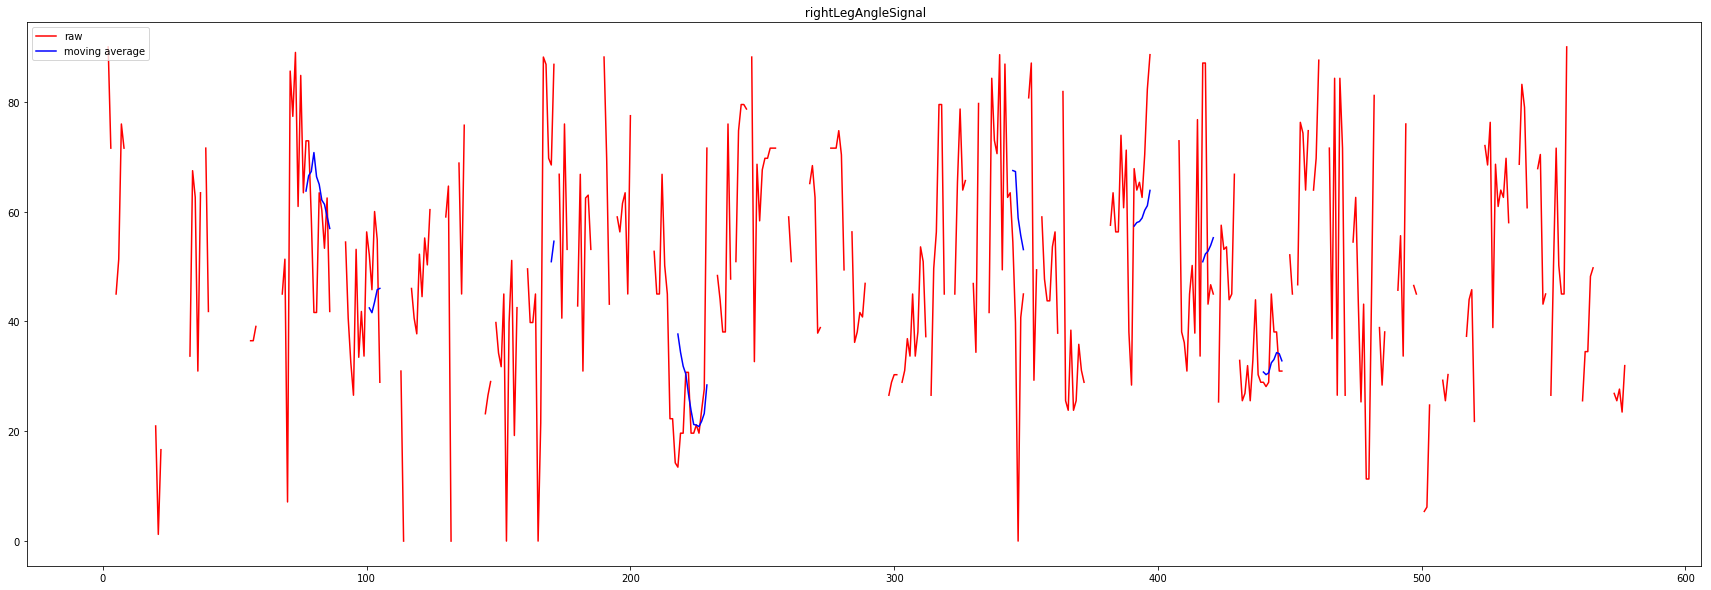

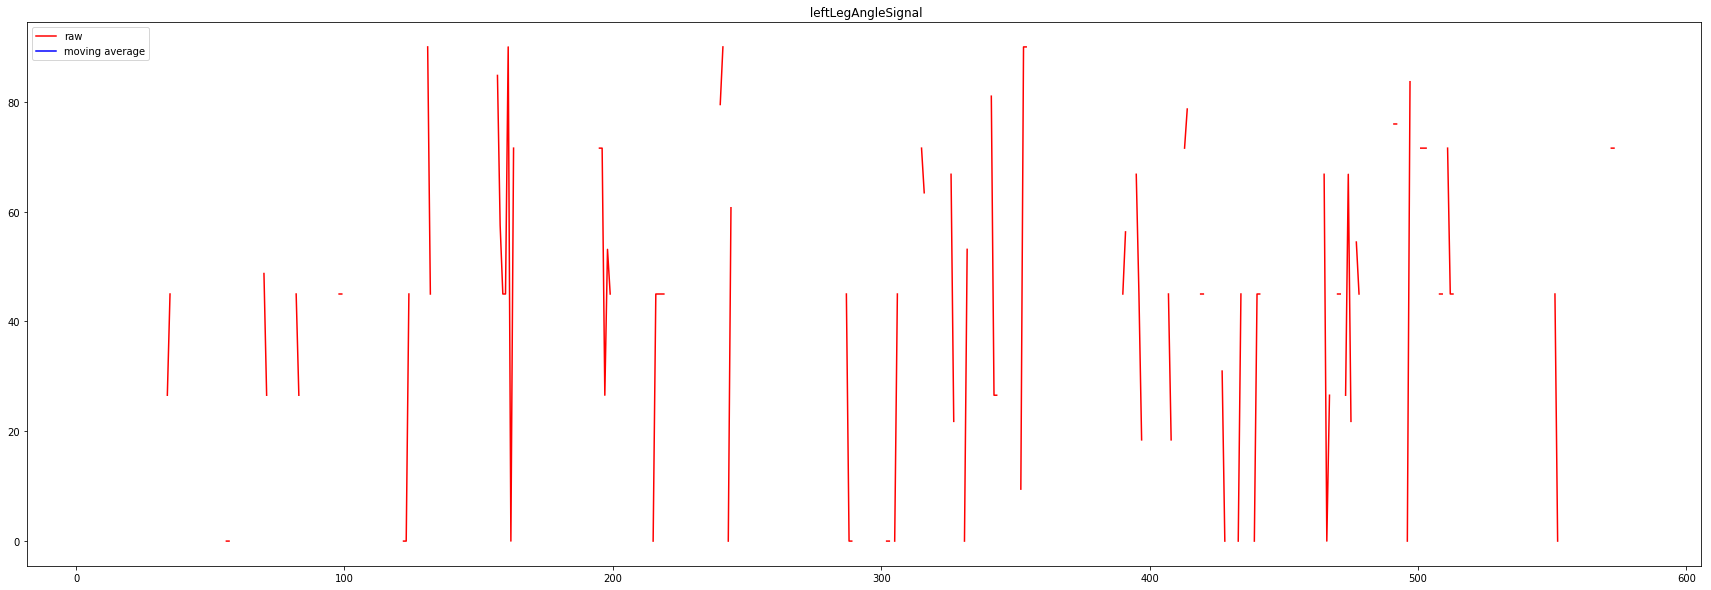

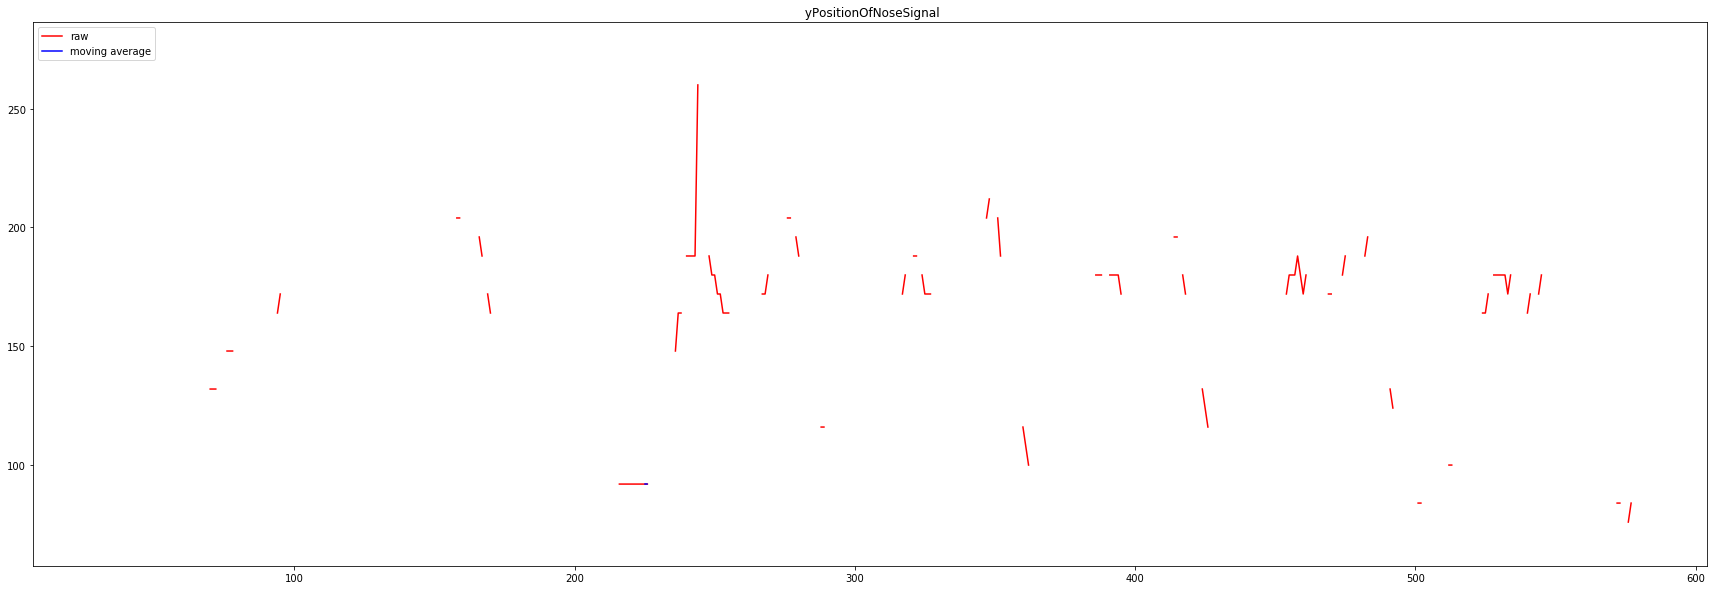

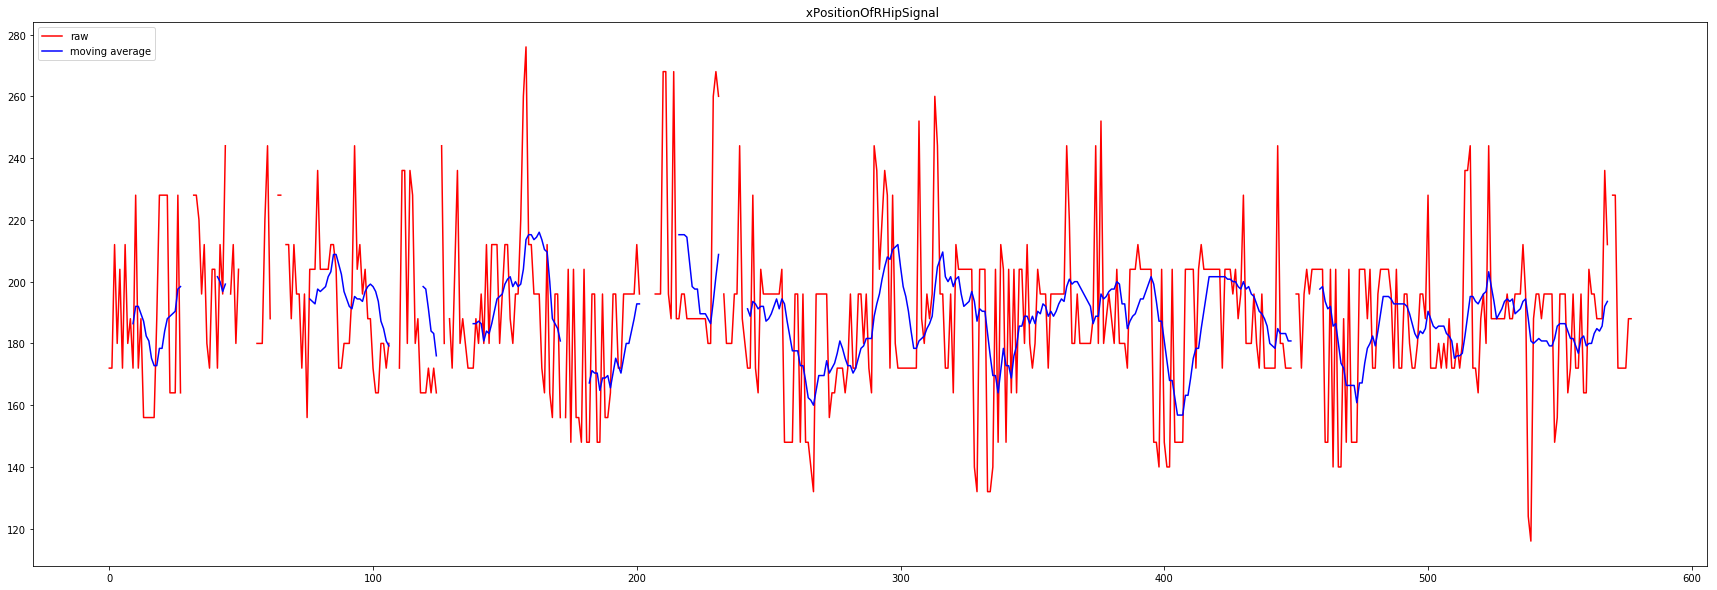

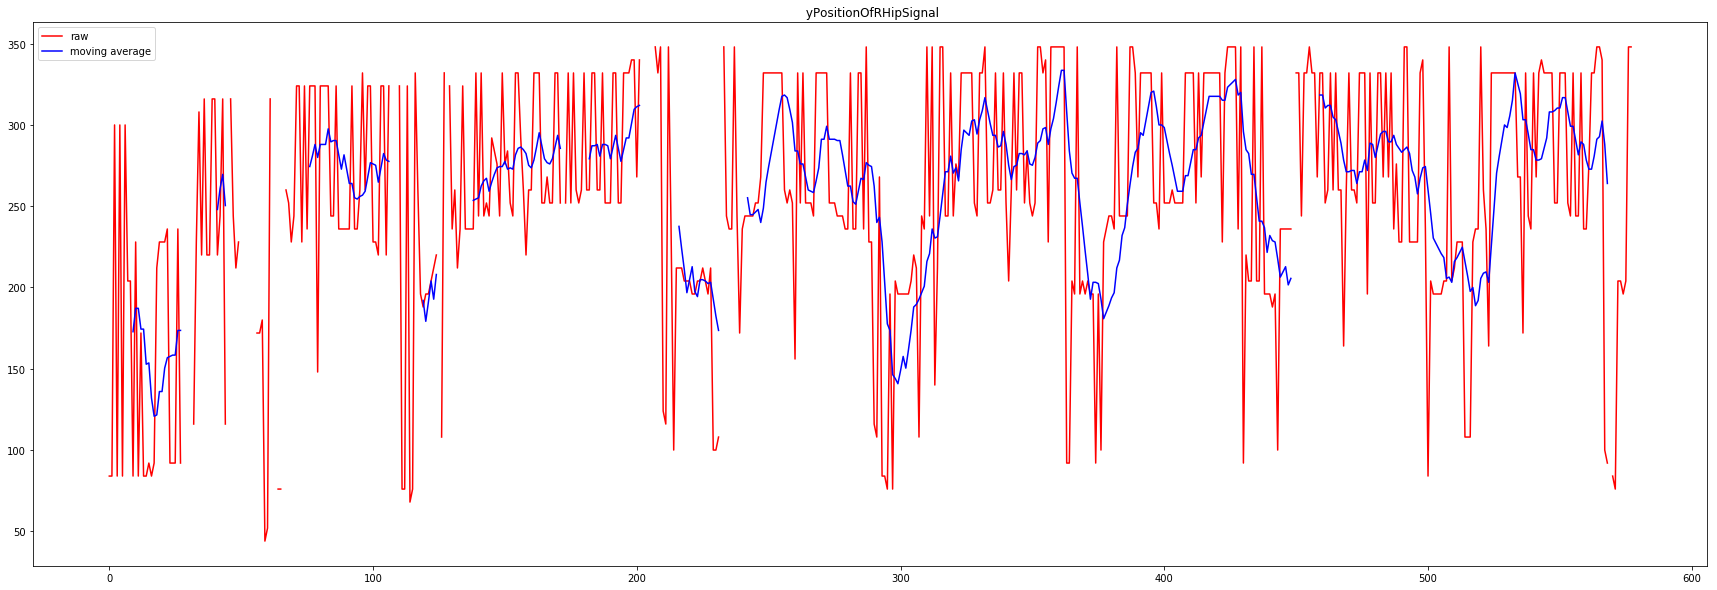

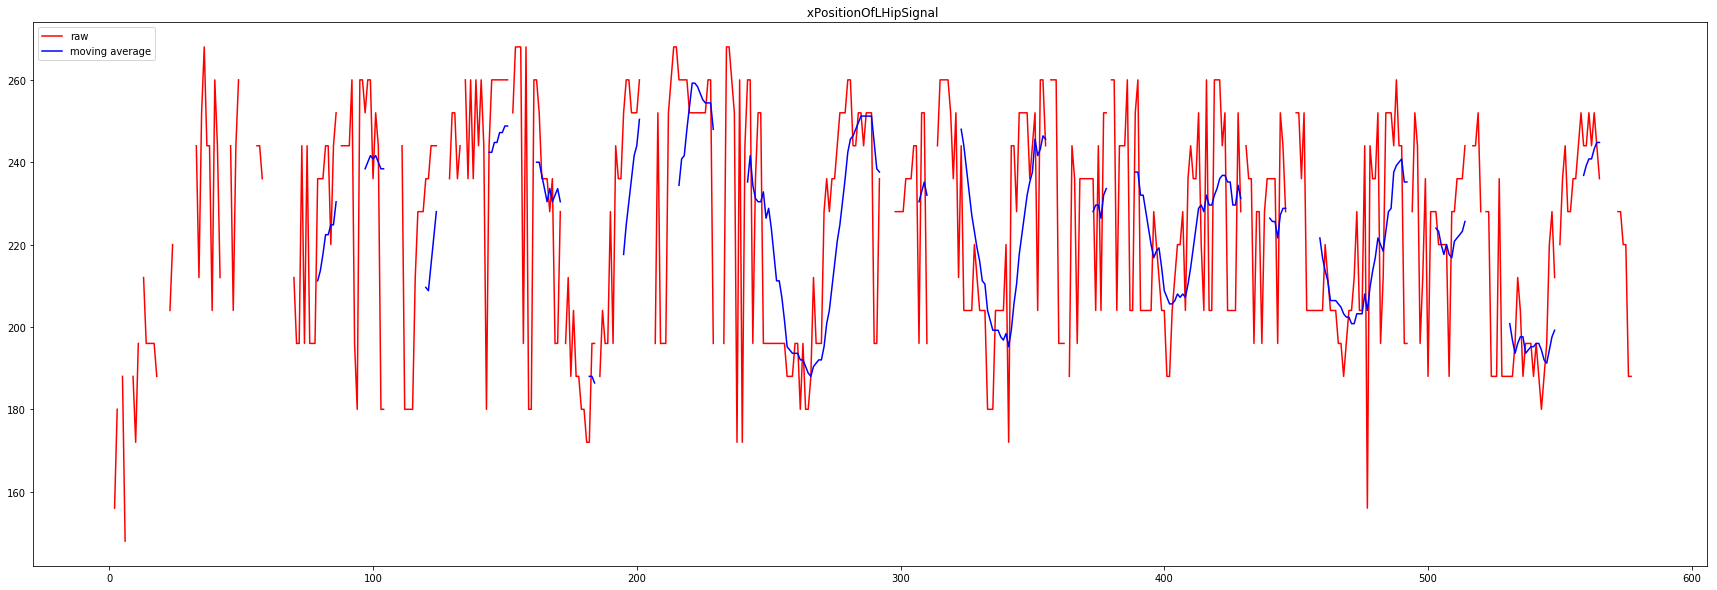

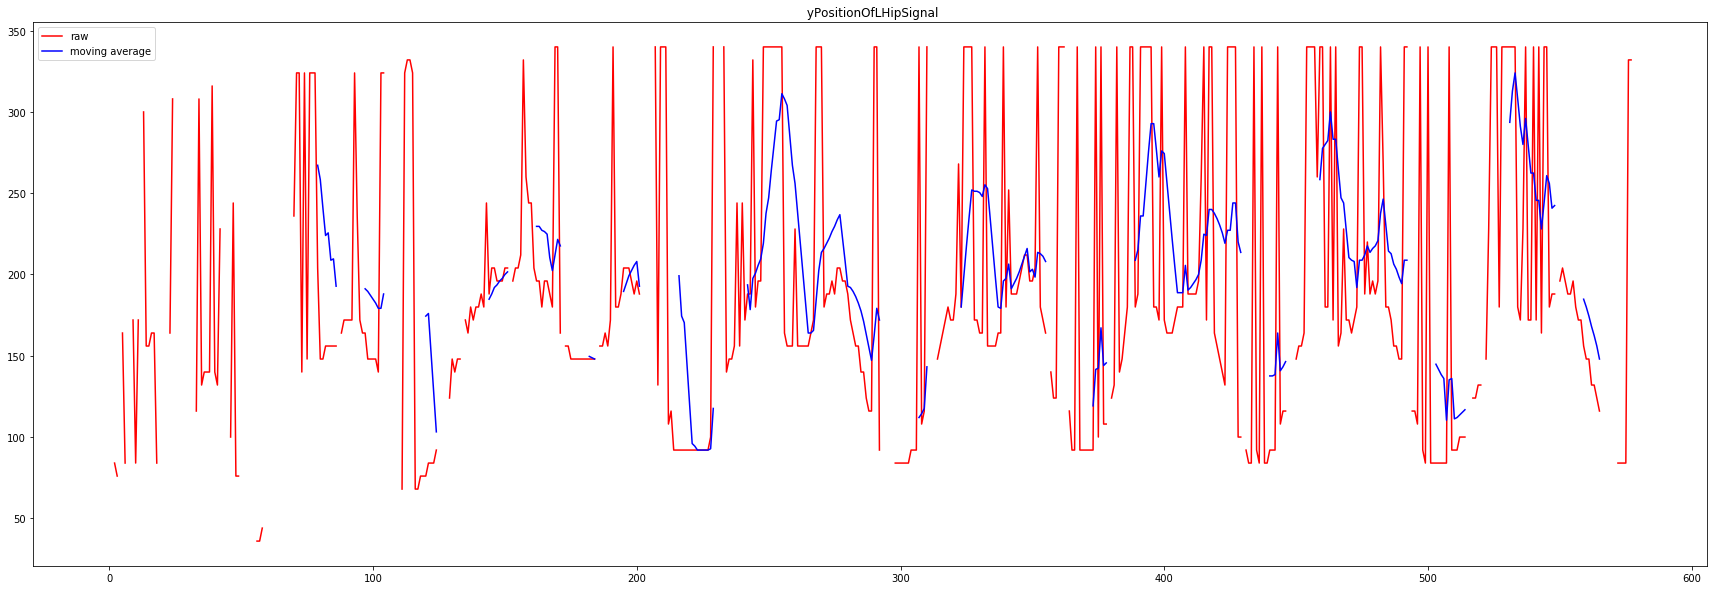

In [31]:
for column_name in df.columns[1:]: #iterate over all columns except the first one which is the "index" column
    
    particular_signal_df = df[column_name]
    
    particular_signal_df_rolling_average = particular_signal_df.rolling(window=10).mean()
    
    plt.figure() #create a new matplotlib chart
    plt.figure(figsize=(30,10))
    
    plt.title(column_name)
        
    plt.plot(particular_signal_df, label="raw", color="red")
    
    plt.plot(particular_signal_df_rolling_average, label="moving average", color="blue")
    
    plt.legend(loc='upper left')
    
    plt.savefig("/Users/sreeharirammohan/Desktop/Sit-to-stand test/iPhone-Signal-Analysis/"+column_name)

# Periodograms

In [32]:
from scipy.signal import periodogram, lombscargle

### Our signal is sparse and NOT sampled at a constant ∆t seconds so we cannot use a normal periodogram. The periodogram relies on the Discrete Fourier Transform which assumes that the data is continuous and that there are no gaps. To account for this, let's use the Lomb-Scargle periodogram

start of loop
 rightLegAngleSignal
end of loop
start of loop
 leftLegAngleSignal
end of loop
start of loop
 yPositionOfNoseSignal
end of loop
start of loop
 xPositionOfRHipSignal
end of loop
start of loop
 yPositionOfRHipSignal
end of loop
start of loop
 xPositionOfLHipSignal
end of loop
start of loop
 yPositionOfLHipSignal
end of loop


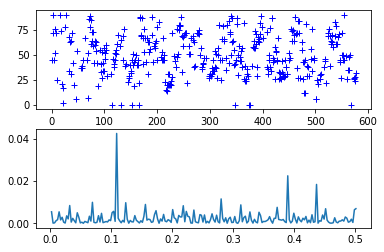

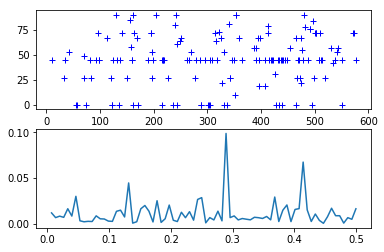

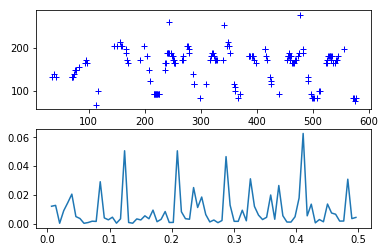

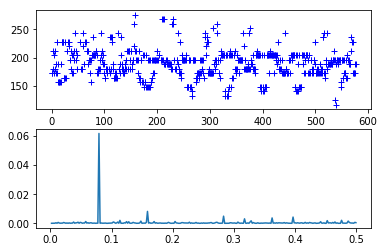

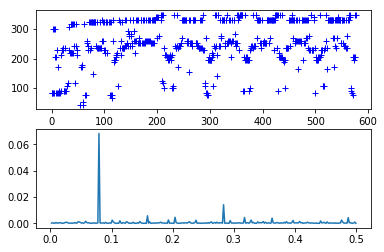

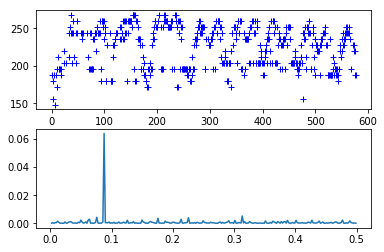

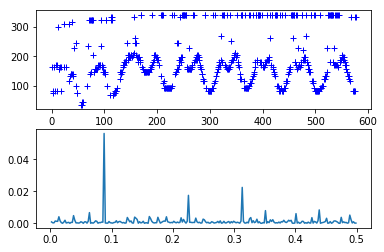

In [33]:
for column_name in df.columns[1:]:
    
    print("start of loop")
    df_to_periodify = df.iloc[:, [0, df.columns.get_loc(column_name)]].copy(deep=True)
    df_to_periodify.dropna(axis=0, inplace=True)
    
    x = df_to_periodify.iloc[:, 0]
    y = df_to_periodify.iloc[:, 1]

    #all periodograms are just brute forced, lets just use 10,000 possibles f's
    f = np.linspace(1, round(len(x)/2), round(len(x)/2))
    
    f_translated_for_plotting = f.copy()/len(x)    
                
    pgram = lombscargle(x, y, f, normalize=True)
    
    plt.figure()
    plt.title(column_name)
    
    print(column_name)
        
    plt.subplot(2, 1, 1)
    plt.plot(x, y, 'b+')

    plt.subplot(2, 1, 2)
    plt.plot(f_translated_for_plotting, pgram)
    print("end of loop")
    
    plt.savefig("/Users/sreeharirammohan/Desktop/Sit-to-stand test/iPhone-Signal-Analysis/" + "periodogram_of_" + column_name)


In [34]:
pgram = pd.read_csv('pgram.csv')

In [35]:
pgram.head()

,Index,pgram
0,0,25.025576
1,1,0.059827
2,2,0.162906
3,3,0.017692
4,4,0.044870


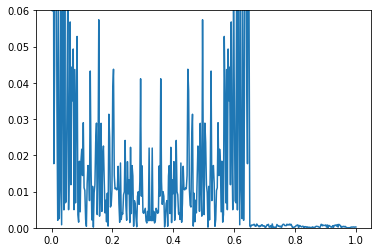

In [36]:
plt.plot(pgram.iloc[:, 0]/pgram.iloc[:, 0].max(), pgram.iloc[:, 1])
plt.ylim(0, 0.06)
plt.savefig("iOS-periodogram")

In [37]:
# Calculating a periodogram manually using FFT (without Scipy) to see if there is a comparison with the iOS periodogram

In [38]:
df.columns

Index(['Index', ' rightLegAngleSignal', ' leftLegAngleSignal',
       ' yPositionOfNoseSignal', ' xPositionOfRHipSignal',
       ' yPositionOfRHipSignal', ' xPositionOfLHipSignal',
       ' yPositionOfLHipSignal'],
      dtype='object')

In [51]:
rightLegAngle = df.iloc[:, 1]

In [53]:
rightLegAngle.dropna(axis=0, inplace=True)

In [55]:
rightLegAngle.head()

0    45.000000
2    90.000000
3    71.565051
5    45.000000
6    51.340192
Name:  rightLegAngleSignal, dtype: float64

In [80]:
signal = np.array(rightLegAngle)

In [71]:
pgram = (2.0/len(signal)) * numpy.power(numpy.fft.fft(signal), 2)

/Users/sreeharirammohan/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


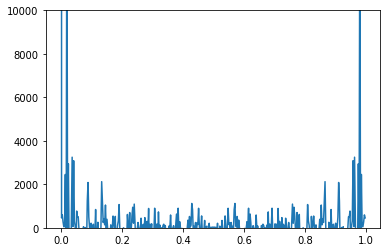

In [91]:
plt.plot(np.array(range(len(pgram)))/len(pgram), pgram)
plt.ylim(0, 10000)
plt.savefig("pure-numpy-periodogram")